P-value: 0.0547


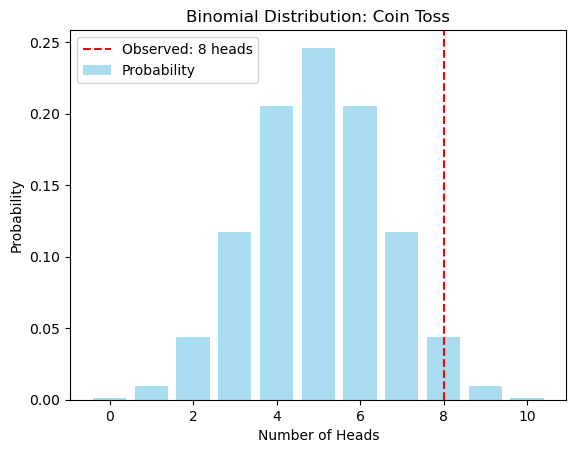

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Parameters
n_tosses = 10  # Total coin tosses
p_heads = 0.5  # Probability of heads under null hypothesis
observed_heads = 8  # Observed number of heads

# Calculate p-value: P(X >= observed_heads)
p_value = 1 - binom.cdf(observed_heads - 1, n_tosses, p_heads)

print(f"P-value: {p_value:.4f}")

# Plot the binomial distribution
x = np.arange(0, n_tosses + 1)
y = binom.pmf(x, n_tosses, p_heads)

plt.bar(x, y, color='skyblue', alpha=0.7, label="Probability")
plt.axvline(observed_heads, color='red', linestyle='--', label=f'Observed: {observed_heads} heads')
plt.title("Binomial Distribution: Coin Toss")
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.legend()
plt.savefig('CoinToss.png')
plt.show()


In [3]:
# Simulate tossing the coin 100 times
n_tosses_large = 100
observed_heads_large = 65  # Example: 65 heads observed in 100 tosses
p_value_large = 1 - binom.cdf(observed_heads_large - 1, n_tosses_large, p_heads)

print(f"P-value with 100 tosses: {p_value_large:.4f}")


P-value with 100 tosses: 0.0018


In [4]:
# Repeat the experiment 1000 times
repeats = 1000
p_values = []
for _ in range(repeats):
    heads = np.random.binomial(n_tosses, p_heads)
    p_values.append(1 - binom.cdf(heads - 1, n_tosses, p_heads))

average_p_value = np.mean(p_values)
print(f"Average P-value after 1000 repeats: {average_p_value:.4f}")


Average P-value after 1000 repeats: 0.6040


In [5]:
from statsmodels.stats.proportion import proportion_confint

# Confidence interval for observed proportion of heads
observed_proportion = observed_heads / n_tosses
ci_low, ci_high = proportion_confint(observed_heads, n_tosses, alpha=0.05, method='normal')

print(f"95% Confidence Interval for fairness of the coin: [{ci_low:.3f}, {ci_high:.3f}]")


95% Confidence Interval for fairness of the coin: [0.552, 1.000]
